In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import xgboost as xgb
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
np.random.seed(41)

In [3]:
df = pd.read_csv("newcleaned_result.csv")
df

,timestamp,currentCharge,application_workload,brightness,gps,power_saving,refresh_rate,discharge_rate
0,1709517229,2134650,0,0,0,0,60,2247.000000
1,1709517350,2134650,0,0,0,0,120,2247.000000
2,1709517471,2134650,0,0,0,1,60,2247.000000
3,1709517591,2134650,0,0,0,1,120,2247.000000
4,1709517712,2134650,0,0,1,0,60,2247.000000
...,...,...,...,...,...,...,...,...
265,1710189999,471870,5,60,0,0,60,7490.000000
266,1710190120,471870,5,60,0,0,120,7490.000000
267,1710190240,471870,5,60,0,1,60,7490.000000
268,1710190361,449400,5,60,0,1,120,9808.333333


In [4]:
df.describe()

,timestamp,currentCharge,application_workload,brightness,gps,power_saving,refresh_rate,discharge_rate
count,2.700000e+02,2.700000e+02,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,1.709621e+09,1.417857e+06,2.325926,47.555556,0.496296,0.500000,89.777778,11546.753086
std,2.134964e+05,5.426426e+05,1.628417,33.781865,0.500915,0.500929,30.054886,37261.886366
min,1.709517e+09,4.494000e+05,0.000000,0.000000,0.000000,0.000000,60.000000,2247.000000
25%,1.709525e+09,9.044175e+05,1.000000,20.000000,0.000000,0.000000,60.000000,4494.000000
50%,1.709533e+09,1.584135e+06,2.000000,40.000000,0.000000,0.500000,60.000000,7490.000000
75%,1.709580e+09,1.904332e+06,4.000000,80.000000,1.000000,1.000000,120.000000,11235.000000
max,1.710190e+09,2.134650e+06,5.000000,100.000000,1.000000,1.000000,120.000000,438165.000000


In [5]:
import seaborn as sns
sns.pairplot(df)

Error in callback <function flush_figures at 0x7fd29293beb0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

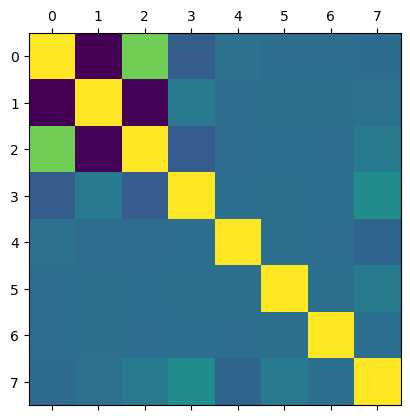

In [23]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

<Axes: >

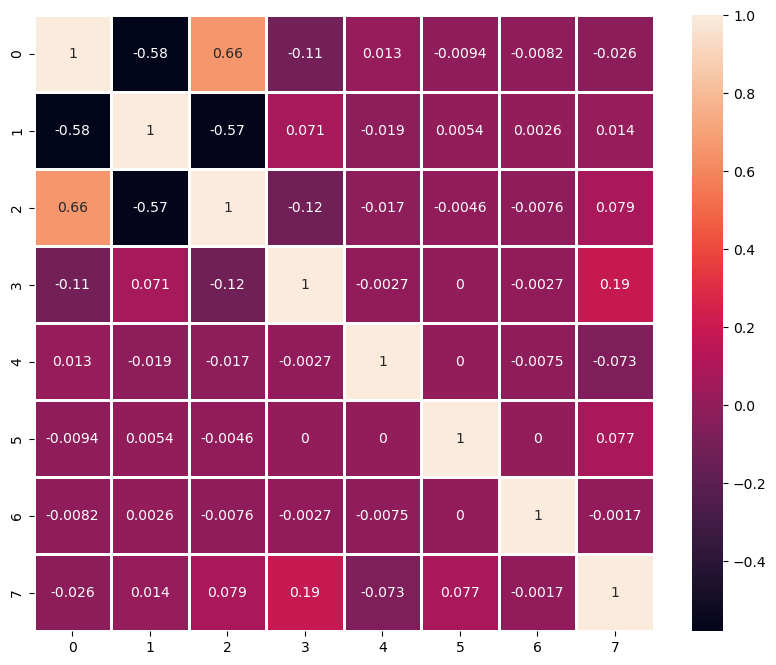

In [24]:
corr = np.corrcoef(df,rowvar=False)
plt.figure(figsize=(10,8))
sns.heatmap(data=corr,linewidths=1,annot=True)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

df.drop(columns = ['timestamp','currentCharge'], inplace=True)

# Split the data into training and test sets
train = df.sample(frac=0.8, random_state=42)
test = df.drop(train.index)
print(train)
print(test)

     application_workload  brightness  gps  power_saving  refresh_rate  \
30                      0          60    1             1            60   
116                     2          40    1             0            60   
79                      1          60    1             1           120   
127                     2          60    1             1           120   
196                     4           0    0             1           120   
..                    ...         ...  ...           ...           ...   
198                     4           0    1             0           120   
242                     5           0    0             0           120   
110                     2          20    1             1            60   
91                      1         100    0             1           120   
83                      1          80    0             1           120   

     discharge_rate  
30           4494.0  
116          7490.0  
79          11235.0  
127         11235.0  
1

In [10]:
# print(test)
# Define the predictor and target variables
X_train = train.drop('discharge_rate', axis=1)
y_train = train['discharge_rate']
X_test = test.drop('discharge_rate', axis=1)
y_test = test['discharge_rate']

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
# y_train_log = y_train
# y_test_log = y_test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train_log)

y_pred_log = model.predict(X_test_scaled)

In [11]:
# Inverse transform the predictions to obtain the original scale
#y_pred = np.expm1(y_pred_log)

mse = mean_squared_error(y_test_log, y_pred_log)
rmse = mean_squared_error(y_test_log, y_pred_log, squared=False)
r2 = r2_score(y_test_log, y_pred_log)
mae = mean_absolute_error(y_test_log, y_pred_log)
adj_r2 = 1 - ((1 - r2) * (len(y_test_log) - 1)) / (len(y_test_log) - X_test_scaled.shape[1] - 1)

import matplotlib.pyplot as plt

# Create a scatter plot of predicted vs. actual values
#plt.scatter(y_test_log, y_pred_log, alpha=0.5)

# Add a line representing the linear regression model
#z = np.polyfit(y_test_log, y_pred_log, 1)
#p = np.poly1d(z)
#plt.plot(y_test_log,p(y_test_log),"r--")

#plt.xlabel("Actual battery consumption")
#plt.ylabel("Predicted battery consumption")
#plt.title("Linear Regression Model")
#plt.show()


print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted R2 score: {adj_r2:.2f}")



MSE: 0.47
RMSE: 0.69
R2 score: 0.26
MAE: 0.46
Adjusted R2 score: 0.19


/home/gabriel/COP5611/cop5611-project/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
from sklearn.tree import DecisionTreeRegressor

# Fit the decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train_log)

# Predict the target variable for the test data
y_pred_log = model.predict(X_test_scaled)

mse = mean_squared_error(y_test_log, y_pred_log)
rmse = mean_squared_error(y_test_log, y_pred_log, squared=False)
r2 = r2_score(y_test_log, y_pred_log)
mae = mean_absolute_error(y_test_log, y_pred_log)
adj_r2 = 1 - ((1 - r2) * (len(y_test_log) - 1)) / (len(y_test_log) - X_test_scaled.shape[1] - 1)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted R2 score: {adj_r2:.2f}")

MSE: 0.25
RMSE: 0.50
R2 score: 0.61
MAE: 0.33
Adjusted R2 score: 0.57


/home/gabriel/COP5611/cop5611-project/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
from sklearn.ensemble import RandomForestRegressor

# Fit the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train_log)

# Predict the target variable for the test data
y_pred_log = model.predict(X_test_scaled)

mse = mean_squared_error(y_test_log, y_pred_log)
rmse = mean_squared_error(y_test_log, y_pred_log, squared=False)
r2 = r2_score(y_test_log, y_pred_log)
mae = mean_absolute_error(y_test_log, y_pred_log)
adj_r2 = 1 - ((1 - r2) * (len(y_test_log) - 1)) / (len(y_test_log) - X_test_scaled.shape[1] - 1)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted R2 score: {adj_r2:.2f}")

MSE: 0.20
RMSE: 0.44
R2 score: 0.69
MAE: 0.32
Adjusted R2 score: 0.66


/home/gabriel/COP5611/cop5611-project/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
from sklearn.svm import SVR

# Fit the SVR model
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model.fit(X_train_scaled, y_train_log)

# Predict the target variable for the test data
y_pred_log = model.predict(X_test_scaled)

mse = mean_squared_error(y_test_log, y_pred_log)
rmse = mean_squared_error(y_test_log, y_pred_log, squared=False)
r2 = r2_score(y_test_log, y_pred_log)
mae = mean_absolute_error(y_test_log, y_pred_log)
adj_r2 = 1 - ((1 - r2) * (len(y_test_log) - 1)) / (len(y_test_log) - X_test_scaled.shape[1] - 1)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted R2 score: {adj_r2:.2f}")

MSE: 0.56
RMSE: 0.75
R2 score: 0.14
MAE: 0.47
Adjusted R2 score: 0.05


/home/gabriel/COP5611/cop5611-project/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit the Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train_scaled, y_train_log)

# Predict the target variable for the test data
y_pred_log = model.predict(X_test_scaled)

mse = mean_squared_error(y_test_log, y_pred_log)
rmse = mean_squared_error(y_test_log, y_pred_log, squared=False)
r2 = r2_score(y_test_log, y_pred_log)
mae = mean_absolute_error(y_test_log, y_pred_log)
adj_r2 = 1 - ((1 - r2) * (len(y_test_log) - 1)) / (len(y_test_log) - X_test_scaled.shape[1] - 1)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted R2 score: {adj_r2:.2f}")

MSE: 0.25
RMSE: 0.50
R2 score: 0.62
MAE: 0.33
Adjusted R2 score: 0.58


/home/gabriel/COP5611/cop5611-project/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:

model = BayesianRidge(fit_intercept=False)    
model.fit(X_train_scaled, y_train_log)
# Predict the target variable for the test data
y_pred_log = model.predict(X_test_scaled)

mse = mean_squared_error(y_test_log, y_pred_log)
rmse = mean_squared_error(y_test_log, y_pred_log, squared=False)
r2 = r2_score(y_test_log, y_pred_log)
mae = mean_absolute_error(y_test_log, y_pred_log)
adj_r2 = 1 - ((1 - r2) * (len(y_test_log) - 1)) / (len(y_test_log) - X_test_scaled.shape[1] - 1)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"Adjusted R2 score: {adj_r2:.2f}")

MSE: 81.20
RMSE: 9.01
R2 score: -124.95
MAE: 8.98
Adjusted R2 score: -138.07


/home/gabriel/COP5611/cop5611-project/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
